<a href="https://www.inove.com.ar"><img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/PA%20Banner.png" width="1000" align="center"></a>


# Ejercicio de clasificación con redes neuronales profundas (DNN)

Ejemplo de clasificación utilizando redes neuronales para la clasificación de imagenes<br>

v1.1

In [1]:
import os
import platform

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import keras
from keras.models import Sequential
#from keras.utils import to_categorical  
from keras.utils.np_utils import to_categorical # Si esto no funciona, probar con el import anterior

# Recolectar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline1.png" width="1000" align="middle">

In [4]:
from keras.datasets import fashion_mnist

# Leer el dataset de mnist
(data_X_train, data_y_train), (data_X_test, data_y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


### `Fashion MNIST dataset`:
El dataset **`Fashion MNIST`** contiene 70.000 imagenes de categorías de ropa (remeras, zapatillas, pantalones). Cada imagen es de 28x28 píxeles en escala de grises (1 canal o 1 nivel de profundidad). Es uno de los dataset más utilizados para poner a prueba algoritmos de clasificación de imagenes.<br> [Dataset source](https://keras.io/api/datasets/fashion_mnist/)
- La entrada (X) es una variable imagen de 28x28
- La salida (y) es el la posible categoría de ropa que pertenece la imagen:

    - 0 -> T-shirt/top (remera de manga corta)
    - 1	-> Trouser (pantalón)
    - 2	-> Pullover (pulover)
    - 3	-> Dress (vestido)
    - 4	-> Coat (saco)
    - 5	-> Sandal (sandalia)
    - 6	-> Shirt (remera de manga larga)
    - 7	-> Sneaker (zapatilla)
    - 8	-> Bag (bolso)
    - 9	-> Ankle boot (bota)


In [15]:
category_list = ["remera_corta", "pantalon", "pulover", "vestido", "saco", "sandal",
                 "remera_larga", "zapatilla", "bolso", "bota"]

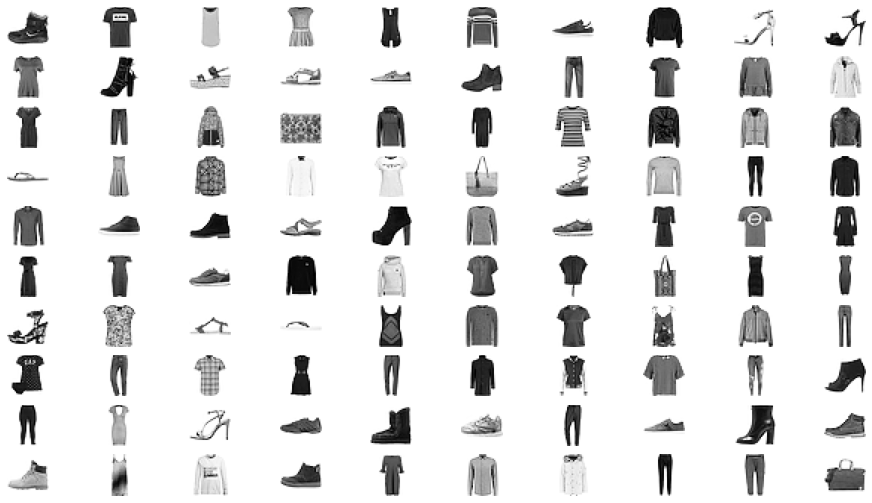

In [5]:
# Visualizar las 100 primeras imagenes
fig = plt.figure(figsize=(16,9))
for i in range(100):
    ax = fig.add_subplot(10, 10, i+1)
    ax.axis('off')
    plt.imshow(data_X_train[i], cmap='Greys')
plt.show()

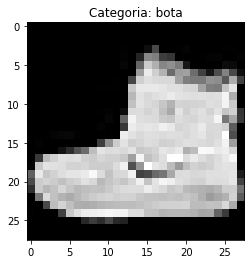

In [16]:
# Alumno, dibuje la primera imagen y su correspondiente categoria
plt.imshow(data_X_train[0], cmap='gray')
plt.title("Categoria: " + category_list[data_y_train[0]])
plt.show()

# Procesar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline2.png" width="1000" align="middle">

In [7]:
# Alumno: Observar como está representada la imagen, ver fila del medio (14)
print(data_X_train[0][14, :])

[  0   0   1   4   6   7   2   0   0   0   0   0 237 226 217 223 222 219
 222 221 216 223 229 215 218 255  77   0]


In [9]:
# Alumno: Normalizar los datos entre 0 y 1
X_train_norm = data_X_train / 255
X_test_norm = data_X_test / 255

In [10]:
# Alumno: Imprimir la cantidad de datos en observacion (cantidad de imagenes)
print('Cantidad de datos en observacion:', X_train_norm.shape[0])

Cantidad de datos en observacion: 60000


In [11]:
# Alumno: Imprimir la dimension de la imagen
print('Tamaño de la imagen:', X_train_norm[0].shape)

Tamaño de la imagen: (28, 28)


# Explorar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline3.png" width="1000" align="middle">

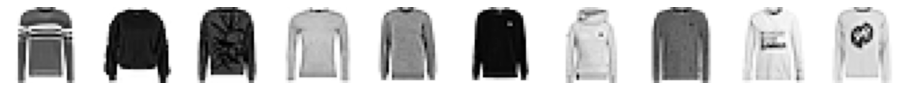

In [70]:
# Alumno: Explorar los primeros diez puloveres del dataset de train
fig = plt.figure(figsize=(16,9))
j = 0

for i in range(10):
    ax = fig.add_subplot(1, 10, i+1)
    ax.axis('off')
    while True:
        if category_list[data_y_train[j]] == "pulover":
            ax.imshow(X_train_norm[j], cmap='Greys')
            j += 1
            break
        j += 1
plt.show()

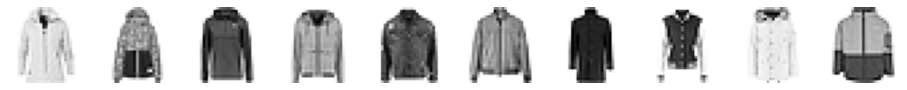

In [71]:
# Alumno: Explorar los primeros diez sacos del dataset de train
fig = plt.figure(figsize=(16,9))
j = 0

for i in range(10):
    ax = fig.add_subplot(1, 10, i+1)
    ax.axis('off')
    while True:
        if category_list[data_y_train[j]] == "saco":
            ax.imshow(X_train_norm[j], cmap='Greys')
            j += 1
            break
        j += 1
plt.show()

Se puede ver que los puloveres y los sacos son muy similares, salvo que los sacos tiene botones o cierre

#### Transformar los imagenes de 28x28 (2 dimensiones) en un array de una dimensión (28x28 = 784)
Esto se realiza porque las redes neuronales no soportan que se ingrese un array de dos dimensiones, solo soportan ingresar "N" features (un array)

In [22]:
# Alumno: Transformar el espacio de variable 28x28 a un vector de 784
# proceso de flatten --> transformar las imagenes en un vector de 1 dimension

num_pixels = X_train_norm.shape[1] * X_train_norm.shape[2]

X_train = X_train_norm.reshape(X_train_norm.shape[0], num_pixels).astype('float32')
X_test = X_test_norm.reshape(X_test_norm.shape[0], num_pixels).astype('float32')

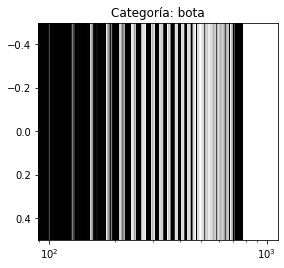

In [24]:
# Alumno: ¿Cómo se ve ahora nuestra primera imagen?
fig = plt.figure()
ax = fig.add_subplot()
ax.imshow(X_train[0].reshape(-1,1).T, cmap='gray')
ax.set_xscale("log")
plt.title("Categoría: " + category_list[data_y_train[0]])
plt.show()

In [25]:
print('Datos en observacion:', X_train.shape)

Datos en observacion: (60000, 784)


Son 60000 vectores, cada vector representa lo mismo que una fila de un dataset. Cada fila o vector tiene 784 columnas

In [26]:
print('Dimensión de cada imagen faltten:', X_train[0].shape)

Dimensión de cada imagen faltten: (784,)


# Entrenar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline4.png" width="1000" align="middle">

Los datos ya estan dividios en train y test

In [28]:
# Alumno: Transformar la salida a oneHotEncoding con to_categorical
# tanto para data_y_train como para data_y_test
y_train = to_categorical(data_y_train)
y_test = to_categorical(data_y_test)
y_train[:10]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32)

In [29]:
# input shape
in_shape = X_train.shape[1]
in_shape

784

In [30]:
# output shape
out_shape = y_train.shape[1]
out_shape

10

In [42]:
from keras.layers import Dense, Dropout

# Alumno, crear un modelo con la cantidad de capas ocultas que crea
# mejor sin regularizacion
model = Sequential()

model.add(Dense(units=128, activation='relu', input_shape=(in_shape,)))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=out_shape, activation='softmax'))

model.compile(optimizer="Adam",
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_13 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_14 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_15 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_16 (Dense)             (None, 10)                650       
Total params: 117,706
Trainable params: 117,706
Non-trainable params: 0
_________________________________________________________________


In [43]:
history = model.fit(X_train, y_train, validation_split=0.2 , epochs=10, batch_size=128)

Epoch 1/10
375/375 [==============================] - 1s 3ms/step - loss: 0.6036 - accuracy: 0.7868 - val_loss: 0.4552 - val_accuracy: 0.8403
Epoch 2/10
375/375 [==============================] - 1s 3ms/step - loss: 0.4083 - accuracy: 0.8531 - val_loss: 0.3999 - val_accuracy: 0.8543
Epoch 3/10
375/375 [==============================] - 1s 3ms/step - loss: 0.3660 - accuracy: 0.8658 - val_loss: 0.3552 - val_accuracy: 0.8719
Epoch 4/10
375/375 [==============================] - 1s 3ms/step - loss: 0.3347 - accuracy: 0.8755 - val_loss: 0.3677 - val_accuracy: 0.8625
Epoch 5/10
375/375 [==============================] - 1s 3ms/step - loss: 0.3177 - accuracy: 0.8821 - val_loss: 0.3438 - val_accuracy: 0.8774
Epoch 6/10
375/375 [==============================] - 1s 3ms/step - loss: 0.2995 - accuracy: 0.8882 - val_loss: 0.3403 - val_accuracy: 0.8778
Epoch 7/10
375/375 [==============================] - 1s 3ms/step - loss: 0.2847 - accuracy: 0.8948 - val_loss: 0.3664 - val_accuracy: 0.8722
Epoch 

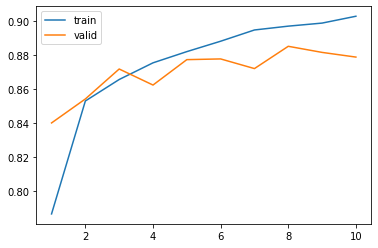

In [44]:
epoch_count = range(1, len(history.history['accuracy']) + 1)
sns.lineplot(x=epoch_count,  y=history.history['accuracy'], label='train')
sns.lineplot(x=epoch_count,  y=history.history['val_accuracy'], label='valid')
plt.show()

In [45]:
# Alumno: Tome el modelo anterior y agregue regularización
model = Sequential()

# Seleccione el dropout_ratev que mejor le funcione
dropout_rate = 0.2

model.add(Dense(units=128, activation='relu', input_shape=(in_shape,)))
model.add(Dense(units=64, activation='relu'))
model.add(Dropout(rate=dropout_rate))
model.add(Dense(units=64, activation='relu'))
model.add(Dropout(rate=dropout_rate))
model.add(Dense(units=64, activation='relu'))
model.add(Dropout(rate=dropout_rate))
model.add(Dense(units=out_shape, activation='softmax'))

model.compile(optimizer="Adam",
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_18 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_19 (Dense)             (None, 64)                4160      
_________________________________________________________________
dropout_3 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_20 (Dense)             (None, 64)                4160      
_________________________________________________________________
dropout_4 (Dropout)          (None, 64)               

In [46]:
history = model.fit(X_train, y_train, validation_split=0.2 , epochs=10, batch_size=128)

Epoch 1/10
375/375 [==============================] - 1s 4ms/step - loss: 0.7685 - accuracy: 0.7256 - val_loss: 0.4228 - val_accuracy: 0.8476
Epoch 2/10
375/375 [==============================] - 1s 3ms/step - loss: 0.4742 - accuracy: 0.8349 - val_loss: 0.3968 - val_accuracy: 0.8536
Epoch 3/10
375/375 [==============================] - 1s 3ms/step - loss: 0.4254 - accuracy: 0.8501 - val_loss: 0.3777 - val_accuracy: 0.8607
Epoch 4/10
375/375 [==============================] - 1s 3ms/step - loss: 0.3959 - accuracy: 0.8615 - val_loss: 0.3832 - val_accuracy: 0.8633
Epoch 5/10
375/375 [==============================] - 1s 3ms/step - loss: 0.3707 - accuracy: 0.8678 - val_loss: 0.3500 - val_accuracy: 0.8740
Epoch 6/10
375/375 [==============================] - 1s 3ms/step - loss: 0.3497 - accuracy: 0.8753 - val_loss: 0.3440 - val_accuracy: 0.8771
Epoch 7/10
375/375 [==============================] - 1s 4ms/step - loss: 0.3381 - accuracy: 0.8797 - val_loss: 0.3397 - val_accuracy: 0.8788
Epoch 

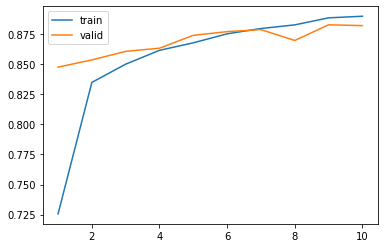

In [47]:
epoch_count = range(1, len(history.history['accuracy']) + 1)
sns.lineplot(x=epoch_count,  y=history.history['accuracy'], label='train')
sns.lineplot(x=epoch_count,  y=history.history['val_accuracy'], label='valid')
plt.show()

In [49]:
# Alumno: Predecir las probabilidades del dataset X_test
y_hat_prob = model.predict(X_test)

In [50]:

# Alumno: Transformar las probabilidades en y_hat usando argmax
y_hat = np.argmax(y_hat_prob,axis=1)

# Validar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline5.png" width="1000" align="middle">

In [51]:
# Alumno: Utilizar evaluate para calcular la exactitud (accuracy)
scores = model.evaluate(X_test, y_test)
scores[1]

313/313 [==============================] - 1s 2ms/step - loss: 0.3560 - accuracy: 0.8716


0.8715999722480774

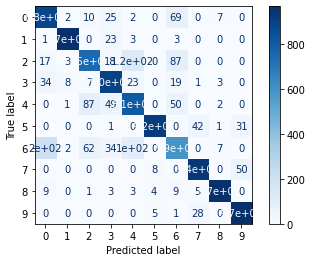

In [52]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test.argmax(axis=1), y_hat)
cmd = ConfusionMatrixDisplay(cm, display_labels=list(range(10)))
cmd.plot(cmap=plt.cm.Blues)
plt.show()

Se puede observar que hay muy malas predicciones en los sacos y vestidos

# Utilizar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline6.png" width="1000" align="middle">

Se utiliza el ranking de los peores 10 sacos clasificados para evaluar

In [57]:
rank_saco = [4166, 4641, 6513, 324, 9292, 4646, 3290, 5255, 5919, 1329]

In [61]:
# Alumno: Obtener los vectores para evaluar los sacos indicados
# Utilizar como máscara rank_saco
X_test_saco = X_test[rank_saco]
y_test_saco = y_test[rank_saco]

In [62]:
# Alumno: Calcular la exactitud de los sacos seleccionados
score = model.evaluate(X_test_saco, y_test_saco)
score[1]

1/1 [==============================] - 0s 2ms/step - loss: 1.8560 - accuracy: 0.0000e+00


0.0

In [63]:
# Alumno: Realizar la prediccion con los X_test de los sacos
# y calcular los y_hat de esos sacos (lo que el sistema ve)
y_hat_prob_saco = model.predict(X_test_saco)
y_hat_saco = np.argmax(y_hat_prob_saco,axis=1)
y_hat_saco

array([2, 2, 2, 6, 2, 2, 2, 2, 2, 2])

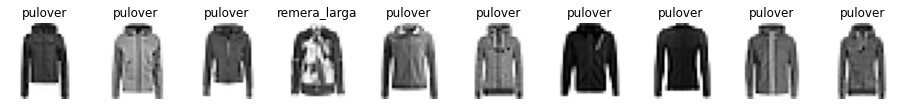

In [73]:
# Alumno: Dibujar las imagenes del dataset X_test correspondiente
# a los IDs de los sacos especificados y colocar arriba de cada imagen
# lo que el modelo predijo
# Utilizar "category_list" para transformar el número a la categoría
fig = plt.figure(figsize=(16,9))
j = 0

for i in rank_saco:
    ax = fig.add_subplot(1, 10, j+1)
    ax.axis('off')
    ax.imshow(X_test_norm[i], cmap='Greys')
    ax.set_title(category_list[y_hat_saco[j]])
    j += 1

plt.show()

# Conclusión
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline7.png" width="1000" align="middle">

Al utilizar deep larning no es posible diferenciar bien entre los sacos y los puloveres, el modelo es incapaz de ver los botones o los cierres que son la clave para diferenciarlos. Una alternativa es probar con redes más aptas para detección de imagenes (las CNN convolucionales, que veremos más adelante)